In [1]:
import pandas as pd
import numpy as np
import statsmodels


/Users/suraj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suraj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [5]:
data = pd.read_csv("fraud1.csv")

data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

data.dropna(inplace=True)

data['type'] = pd.factorize(data['type'])[0]

data['isFraud'] = data['isFraud'].astype('int8')
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype('int8')

data.drop_duplicates(inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1795 non-null   int64  
 1   type            1795 non-null   int64  
 2   amount          1795 non-null   float64
 3   oldbalanceOrg   1795 non-null   float64
 4   newbalanceOrig  1795 non-null   float64
 5   oldbalanceDest  1795 non-null   float64
 6   newbalanceDest  1795 non-null   float64
 7   isFraud         1795 non-null   int8   
 8   isFlaggedFraud  1795 non-null   int8   
dtypes: float64(5), int64(2), int8(2)
memory usage: 101.8 KB
None


In [6]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


# VISUALIZATION

In [7]:
data['isFraud'].value_counts()

isFraud
0    1784
1      11
Name: count, dtype: int64

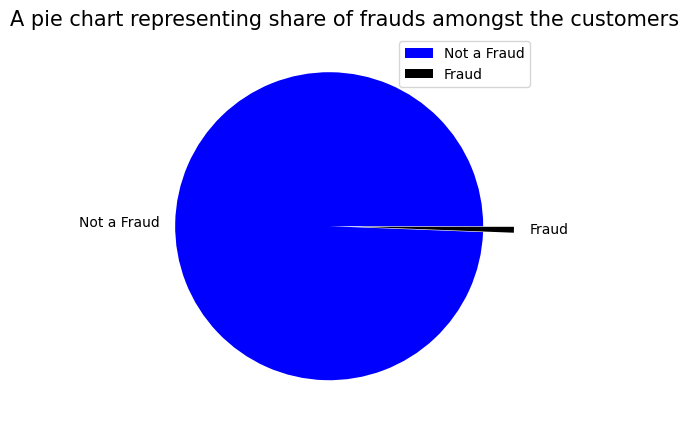

In [8]:
labels = ['Not a Fraud', 'Fraud']
colors = ['blue', 'black']
size = [1784,11]
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, labels = labels, colors = colors, explode = explode)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 15)
plt.legend()
plt.show()

In [9]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    1795
Name: count, dtype: int64

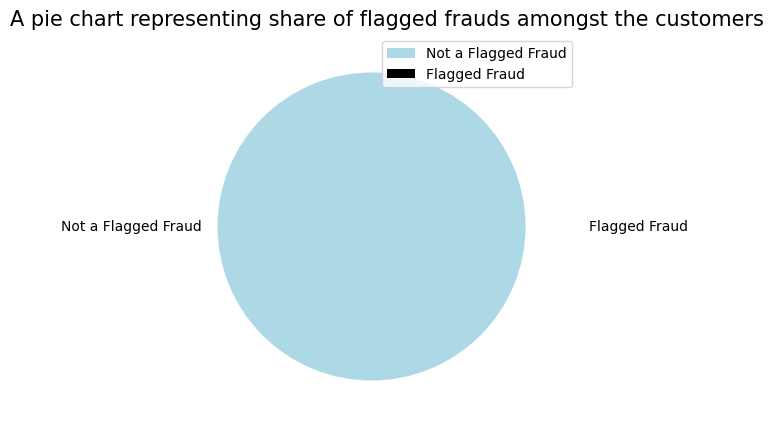

In [10]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [1795,0]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, labels = labels, colors = colors, explode = explode)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 15)
plt.legend()
plt.show()

In [11]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


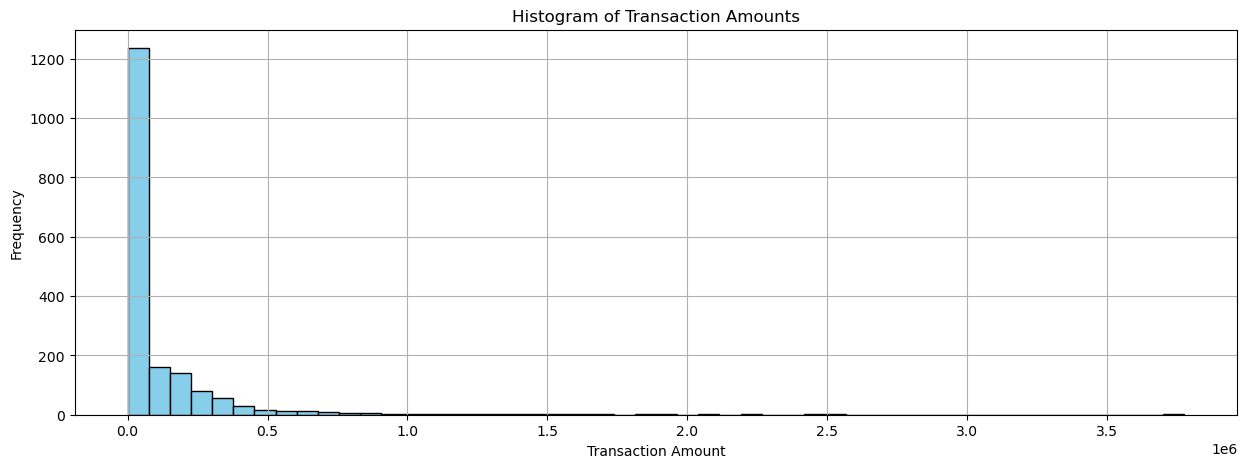

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(data['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

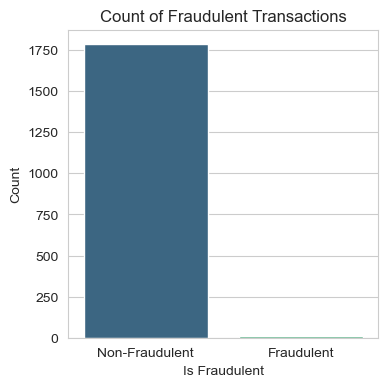

In [13]:
sns.set_style("whitegrid")

plt.figure(figsize=(4, 4))
sns.countplot(x='isFraud', data=data, palette='viridis')
plt.title('Count of Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [14]:
data['type'].value_counts()


type
0    892
4    309
2    276
1    207
3    111
Name: count, dtype: int64

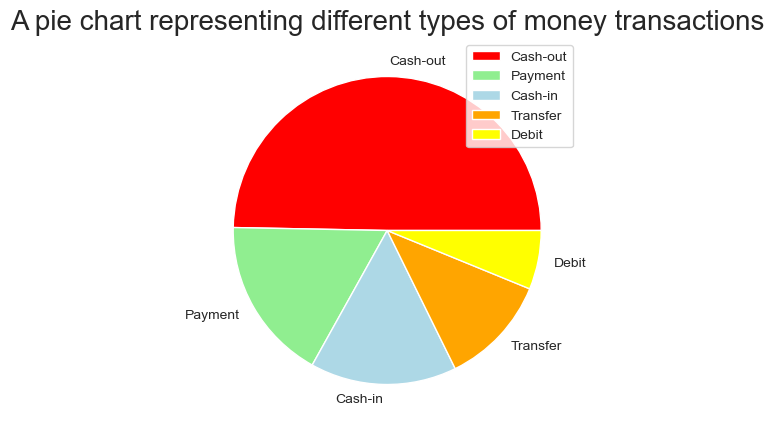

In [15]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [892, 309, 276, 207, 111]
colors = ['red', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0,0,0,0,0]

plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, colors = colors, explode = explode, labels = labels)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

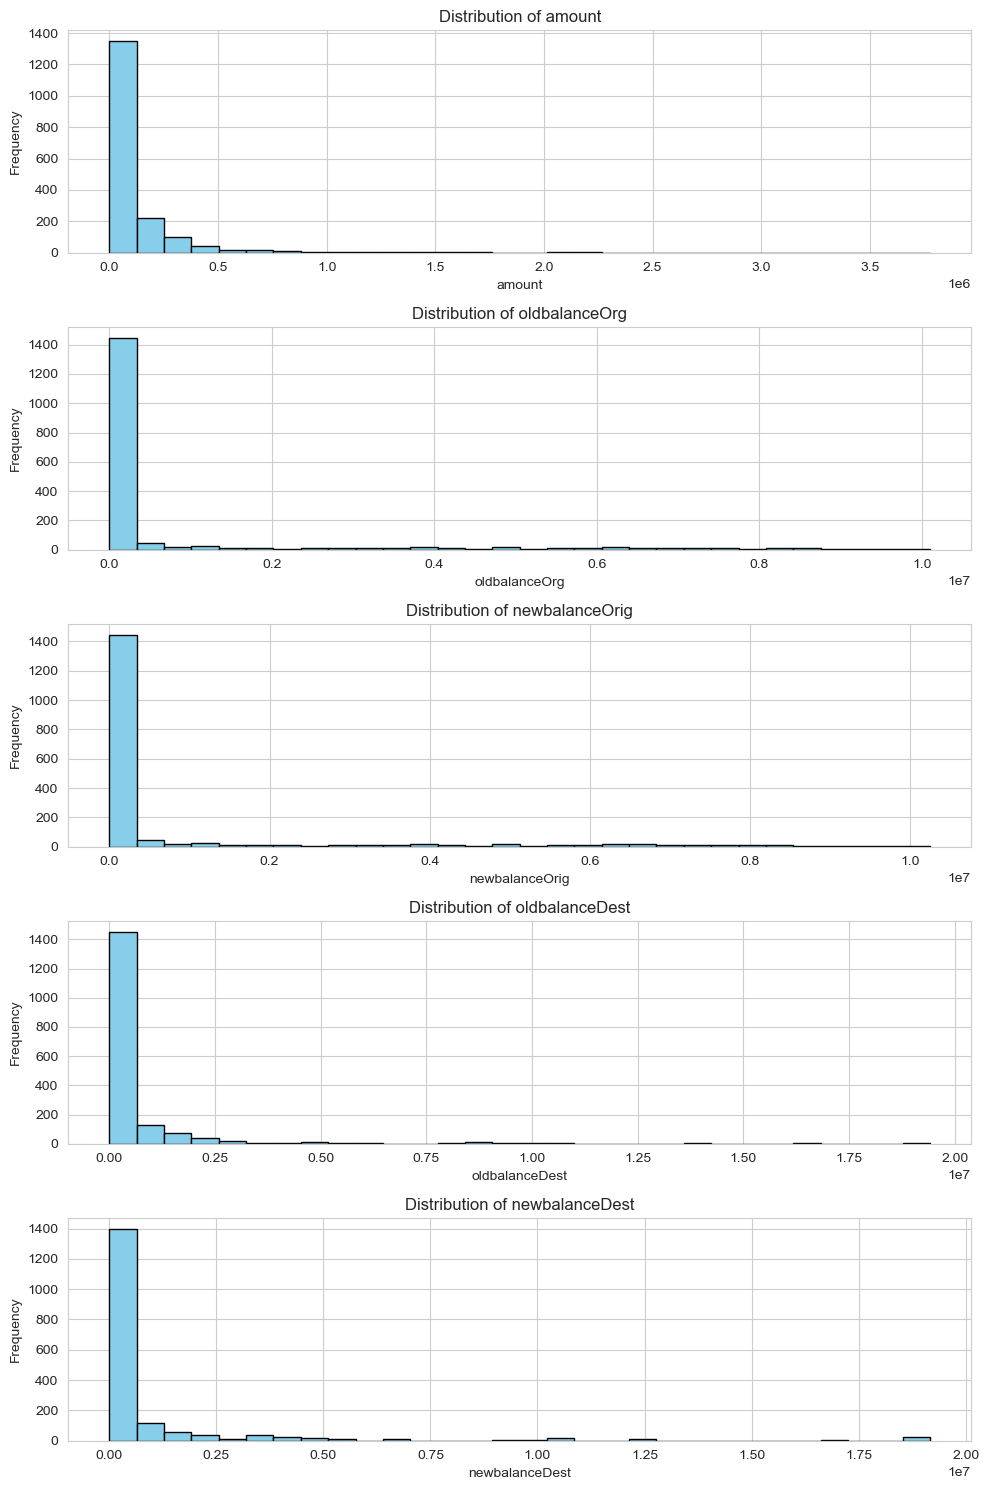

In [16]:
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 15))
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


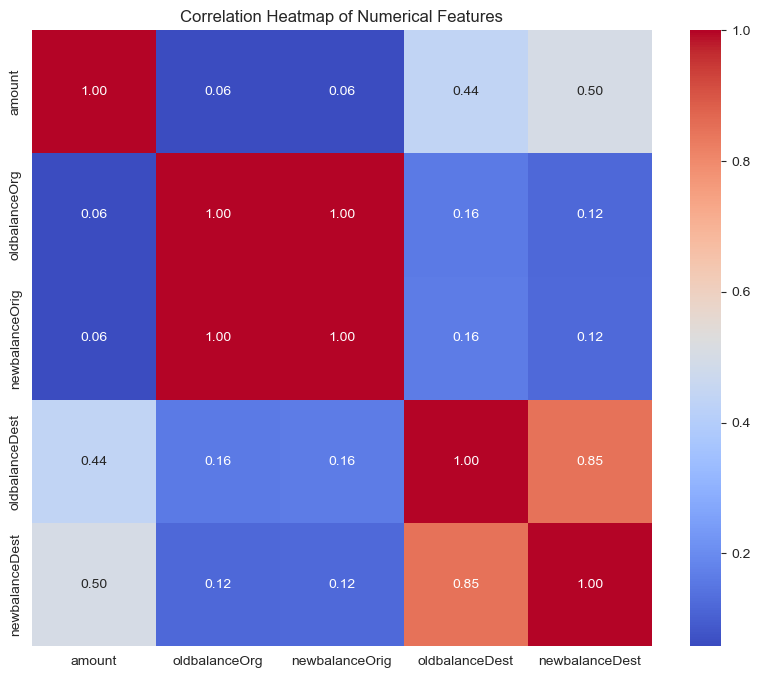

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [18]:
data['type'] = LabelEncoder().fit_transform(data['type'])
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
scaler = StandardScaler()
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])


# Train Logistic Regression

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
r2 = r2_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("R2 Score:", r2)

Logistic Regression Accuracy: 0.9972144846796658
R2 Score: -0.0027932960893854997


# Train Random Forest

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest R2 Score:", rf_r2)


Random Forest Accuracy: 0.9972144846796658
Random Forest R2 Score: -0.0027932960893854997


# Train Gradient Boosting

In [22]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
gb_r2 = r2_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
print("Gradient Boosting R2 Score:", gb_r2)
print("Gradient Boosting F1 Score:", gb_f1)

Gradient Boosting Accuracy: 0.9916434540389972
Gradient Boosting R2 Score: -2.0083798882681565
Gradient Boosting F1 Score: 0.4


# Train XGBoost model

In [23]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)
xgb_r2 = r2_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
print("XGBoost R2 Score:", xgb_r2)

XGBoost Accuracy: 0.9944289693593314
XGBoost R2 Score: -1.005586592178771


# Train AdaBoostRegressor model

In [24]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)

y_pred = adaboost_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
adaboost_r2 = r2_score(y_test, y_pred)
print("R2 Score:", adaboost_r2)


Accuracy: 0.9972144846796658
F1 Score: 0.6666666666666666
R2 Score: -0.0027932960893854997


# Train KNeighborsRegressor model

In [25]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("KNeighborsRegressor Mean Squared Error:", mse)
print("Accuracy:",accuracy)

KNeighborsRegressor Mean Squared Error: 0.002674094707520892
Accuracy: 0.9972144846796658


# Train Support Vector Machine (SVM) regressor model

In [26]:
from sklearn.svm import SVR
svm_regressor = SVR()
svm_regressor.fit(X_train_scaled, y_train)
y_pred = svm_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Machine Mean Squared Error:", mse)
print("Support Vector Machine R^2 Score:", r2)
accuracy=1-svm_regressor.score(X_test_scaled, y_test)
print("Support Vector Machine Accuracy Error:", accuracy)


Support Vector Machine Mean Squared Error: 0.00937258017644706
Support Vector Machine R^2 Score: -2.3741550439124954
Support Vector Machine Accuracy Error: 3.3741550439124954


# Train Decision Tree regressor model

In [27]:
threshold = 0.5
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_scaled, y_train)
y_pred = dt_regressor.predict(X_test_scaled)
y_pred_class = (y_pred > threshold).astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print("Decision Tree Mean Squared Error:", mse)
print("Decision Tree R2 Score:", r2)
print("Decision Tree Accuracy Score:", accuracy)
print("Decision Tree F1 Score:", f1)


Decision Tree Mean Squared Error: 0.008356545961002786
Decision Tree R2 Score: -2.0083798882681565
Decision Tree Accuracy Score: 0.9916434540389972
Decision Tree F1 Score: 0.4


# Train Gaussian Naive Bayes model

In [28]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred = naive_bayes.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Naive Bayes Accuracy Score:", accuracy)
print("Naive Bayes F1 Score:", f1)

Naive Bayes Accuracy Score: 0.807799442896936
Naive Bayes F1 Score: 0.028169014084507043
